# **Multiple Regression Using ANN**

In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
columns= ['crim','zn','indus','chas','nox','rm', 'age','dis','rad','tax','ptratio','black','lstat','medv']
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df = pd.read_csv(url, delim_whitespace=True, header = None)
df.columns = columns
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#To Scale data from 0 to 1 apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(df))
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=columns)

summary = df_scaled.describe()
summary = summary.transpose()
print(summary)

MinMaxScaler()
         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    5

In [4]:
corr = df_scaled.corr(method='pearson')
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


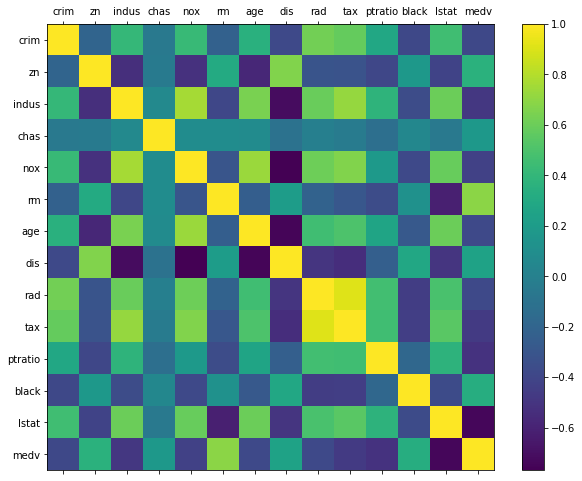

In [5]:
import matplotlib.pyplot as plt
matfig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=matfig.number)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show();

In [6]:
X = df_scaled.drop('medv', axis = 1)
y = df_scaled['medv'].values
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)
print('X shape = ',X.shape)
print('y shape = ',y.shape)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('y train shape = ', y_train.shape)
print('y test shape = ',y_test.shape)

X shape =  (506, 13)
y shape =  (506,)
X train shape =  (404, 13)
X test shape =  (102, 13)
y train shape =  (404,)
y test shape =  (102,)


## **SKLearn Linear Regression Model**

In [7]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predicting over the Test Set and calculating error
y_predLR = lr.predict(X_test)
from sklearn.metrics import mean_squared_error as mse
k = mse(y_predLR, y_test)
print('Linear Regression Model Mean Square Error    ', k )

Linear Regression Model Mean Square Error     0.012932849122296327


## **Keras Artificial Neural Network Model**

In [9]:
X.shape[1]

13

Epoch 1/100
17/17 [==============================] - 1s 6ms/step - loss: 0.1661 - accuracy: 0.0025
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1040 - accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0753 - accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0585 - accuracy: 0.0025
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0495 - accuracy: 0.0025
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0430 - accuracy: 0.0050
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0386 - accuracy: 0.0050
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.0149
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 0.0099
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0281 - accuracy: 0.0272
E

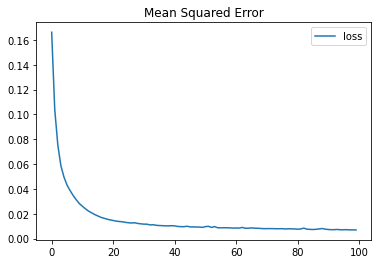

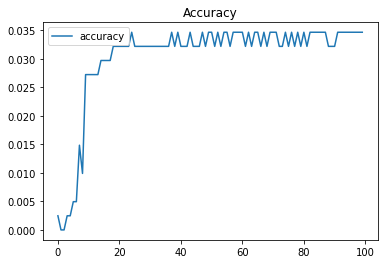

In [10]:
# 1. Define Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=17, input_shape = (X.shape[1],), activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 10, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 1, activation = 'linear'))

# 2. Compile Model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

# 3. Fit Model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 25, verbose = 1)

# 4. Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Mean Squared Error")
history_df.loc[:, ['accuracy']].plot(title="Accuracy")

# 5. Model prediction
y_predANN =  model.predict(X_test)

print('Accuracy of model is : %.3f' %acc)
print('score is : %.3f' %loss)

In [11]:
print('Accuracy of model is : {:.2f} %'.format(acc*100))

Accuracy of model is : 1.96 %


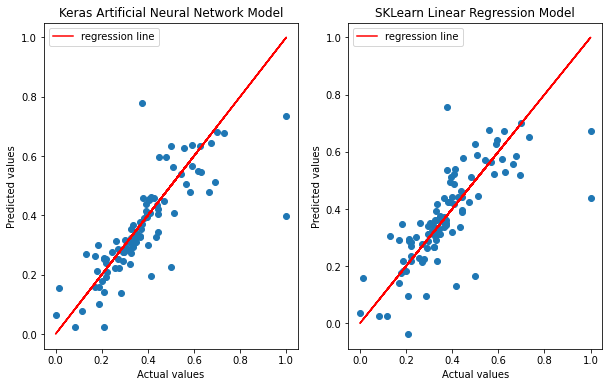

In [12]:
plt.figure(figsize =(10,6))
plt.subplot(121)
plt.scatter(y_test, y_predANN)
plt.plot(y_test, y_test, color = 'r', label = 'regression line' )
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Keras Artificial Neural Network Model")
plt.legend()

plt.subplot(122)
plt.scatter(y_test, y_predLR)
plt.plot(y_test, y_test, color = 'r', label = 'regression line')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.legend()
plt.show()